In [8]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

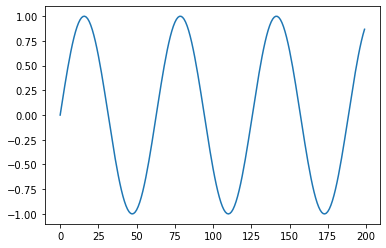

In [3]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1 
plt.plot(series)
plt.show()

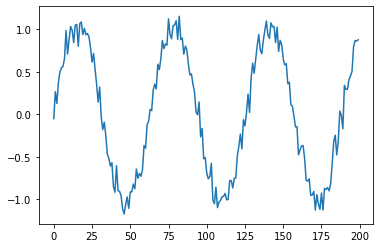

In [4]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1 
plt.plot(series)
plt.show()

In [5]:
# build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

np.array(X).shape
# np.array(Y).shape

(190, 10)

In [6]:
# sequences data -> N x T x D -> 190 x 10 x 1
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10, 1), Y.shape:(190,), N.length:190


In [9]:
# build a RNN model 
# 1. Input  
i = Input(shape=(T, 1)) # T x D
# 2. SimpleRNN(5, activation='tanh')
#x = SimpleRNN(5)(i)
x = LSTM(5)(i)
# 3. Output 
x = Dense(1)(x)
model = Model(i , x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))
# Quiz. trainable params -> 41 = hidden weights + current weights + bais 
#                              = (features * unit) + (unit * unit) + (feature * unit)
#                              = (1 * 5) + (5 * 5) + (1 * 5) = 35

2022-03-16 11:32:01.904604: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 3s 227ms/step - loss: 0.5671 - val_loss: 0.2119
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.1453 - val_loss: 0.1635
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0741 - val_loss: 0.0799
Epoch 4/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0615 - val_loss: 0.0626
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0402 - val_loss: 0.0414
Epoch 6/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0354 - val_loss: 0.0506
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0312 - val_loss: 0.0272
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0266 - val_loss: 0.0313
Epoch 9/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0286 - val_loss: 0.0279
Epoch 10/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0271 - val_loss: 0.0296
Epoch 11/80
3/3 [===========

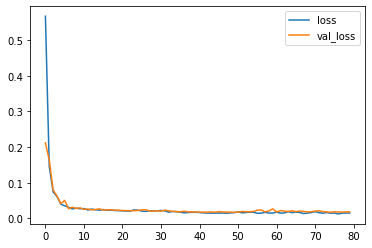

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [13]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0,0]
    i += 1
    
    validation_predictions.append(p)

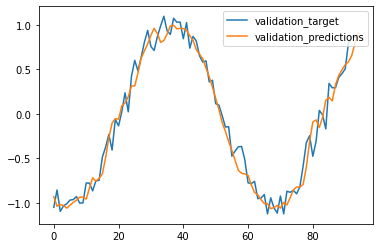

In [14]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()

In [15]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]  

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
#     print(last_x)
    last_x[-1] = p

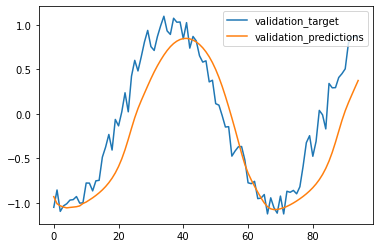

In [16]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()